In [2]:
#Goal :
#membagi data memjadi train data dan validation data
#mengimplementasikan augmentasi gambar
#mengunakan image data generator
#mengunakan model sequential
#akurasi minimum 85%


import tensorflow as tf


#Method 1
#!wget --no-check-certificate \
#  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
#  -O /tmp/rockpaperscissors.zip

#Method 2
extract_files = tf.keras.utils.get_file(origin='https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip',cache_dir='/tmp/',
            fname='/tmp/rockpaperscissors.zip')

In [4]:
import tensorflow as tf
import zipfile as zf
import pathlib
#import google.colab.files as files


local_file = '/tmp/rockpaperscissors.zip'


try:
  extract_files = zf.ZipFile(local_file,'r')
  extract_files.extractall('/tmp/')
  extract_files.close()
  print('Extraksi data sukses')
except(FileNotFoundError):
   print('\ndata tidak ditemukan\n')

   print('Mendownload ulang dataset yang diperlukan')
   extract_files = tf.keras.utils.get_file(origin='https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip',
                                           cache_dir='/tmp/',fname='/tmp/rockpaperscissors.zip')
   extract_files = pathlib.Path(local_file,'r')
   extract_files.extractall('/tmp/')
   extract_files.close()
   print('Extraksi ulang sukses')
except:
  print('tidak dapat melakukan decompresi dataset')
finally:
  print('\n operation terminated\n')

Extraksi data sukses

 operation terminated



In [0]:
#plotting test validation
import matplotlib.pyplot as plt
 

In [5]:
import os 

train_directory = '/tmp/rockpaperscissors/rps-cv-images/'
rock_dir = os.path.join(train_directory,'rock')
paper_dir = os.path.join(train_directory,'paper')
scissors_dir = os.path.join(train_directory,'scissors')

print(os.listdir(train_directory))
print(os.listdir(train_directory[0:5]))

#directory
paper_data = os.listdir(paper_dir)
rock_data = os.listdir(rock_dir)
scissors_data = os.listdir(scissors_dir)

#Kuantitas
sub_dir_Qty = len(os.listdir(train_directory))
paper_Qty = len(os.listdir(paper_dir))
rock_Qty = len(os.listdir(rock_dir))
scissor_Qty = len(os.listdir(scissors_dir))


print(paper_data[:paper_Qty])
print(rock_data[:rock_Qty])
print(scissors_data[:scissor_Qty])


['paper', 'README_rpc-cv-images.txt', 'rock', 'scissors']
['.keras', 'datasets', 'rockpaperscissors', 'rockpaperscissors.zip', '__MACOSX']
['04l5I8TqdzF9WDMJ.png', '0a3UtNzl5Ll3sq8K.png', '0cb6cVL8pkfi4wF6.png', '0eqArS2GgsBeqgSn.png', '0Og76sl5CJhbxWWx.png', '0RA9rcrv8iVvuDDU.png', '0t08v9bAaA0mXGCQ.png', '0Uomd0HvOB33m47I.png', '0vugygEjxQJPr9yz.png', '0zKU6wEhT2cDe9j0.png', '14K62H4KG1hg5qiJ.png', '1Dfw5FRlS4h60JPX.png', '1fKclJk4eBWOQSR1.png', '1Frbe8cdOdkciOBg.png', '1jHtb93pI8f6pfKo.png', '1oKnUgV2CdCaQUUX.png', '1Tt9U9SzrOm98Xtw.png', '1uoW7QcH2qAgCTxv.png', '1yeoLbmp4alVOtFv.png', '1yKjzquSvl9ShK7K.png', '27XFtQjjXQ8AP8Tl.png', '2DQbLQfHlfrcATqi.png', '2F8Ng7620ANA7tEK.png', '2IOsxsG8AaxntdJM.png', '2OCAZGNv2OEzgAwU.png', '2PAcPusQ59xIMfiw.png', '2PiUTczN5Ez4VreF.png', '2SldJqjiZwIVPef9.png', '2tDgPZGqbrw95j39.png', '2UKnsncgPodQLOFR.png', '37PRV3B9HxuUPkQr.png', '389udM70tLrMVL5H.png', '3JN7OPsnxDBpcVeD.png', '3K6a8bG8j1YTH1l0.png', '3MMu7EXUtM6aEtXU.png', '3sKeYzYsjbWQVhc4.pn

In [7]:
#evaluasi data 1

print('total sub directory : ',sub_dir_Qty)
print('total gambar paper :' , paper_Qty)
print('total gambar rock', rock_Qty)
print('total gambar scissor : ', scissor_Qty)
print('keseluruhan : ',paper_Qty+rock_Qty+scissor_Qty)



total sub directory :  4
total gambar paper : 712
total gambar rock 726
total gambar scissor :  750
keseluruhan :  2188


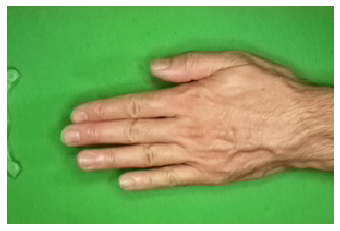

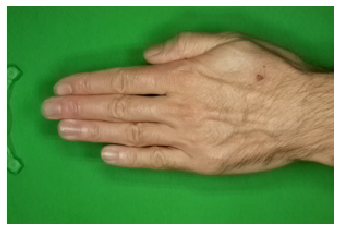

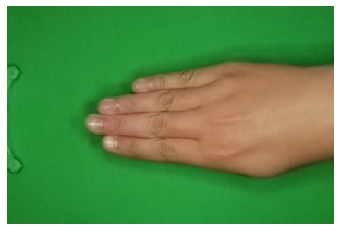

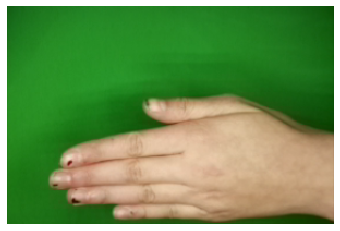

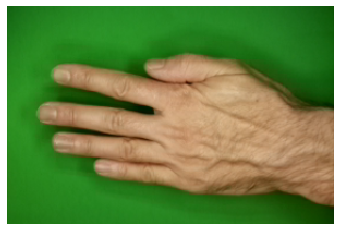

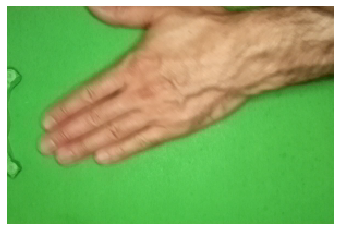

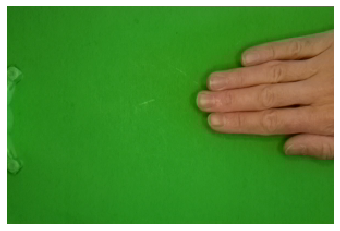

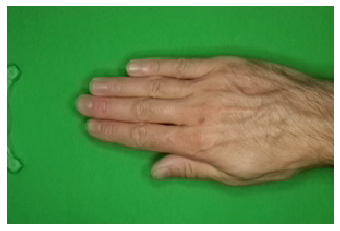

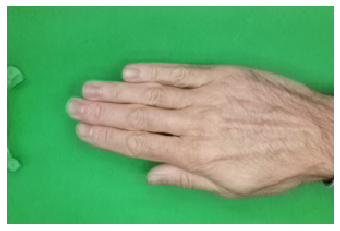

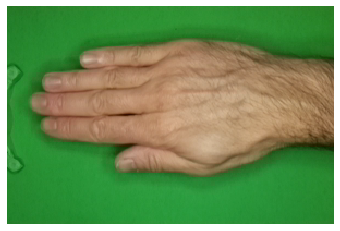

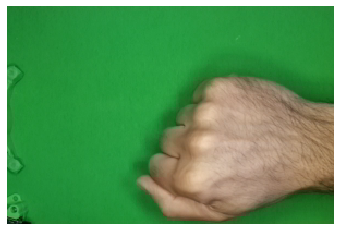

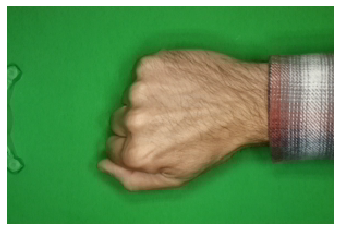

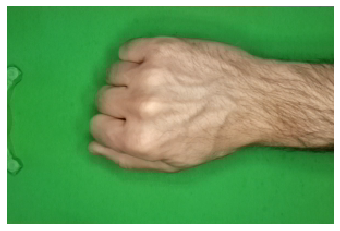

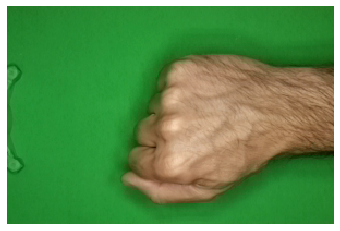

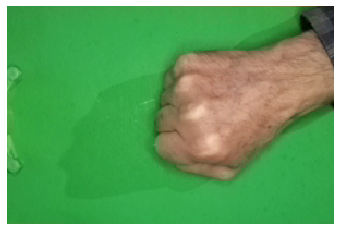

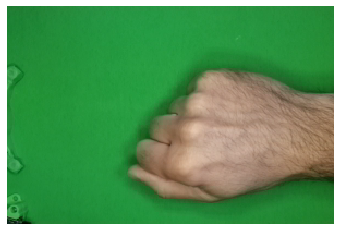

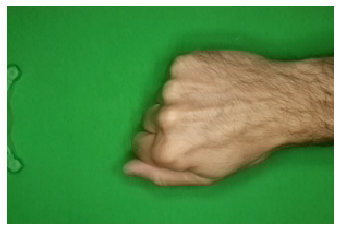

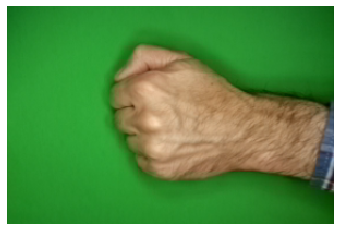

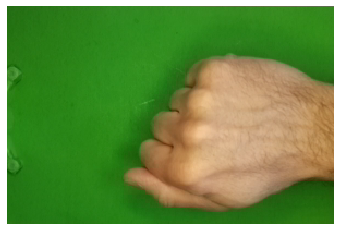

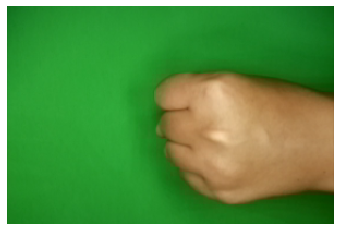

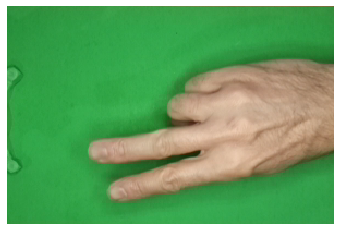

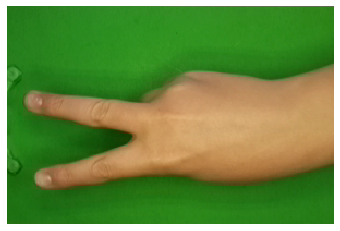

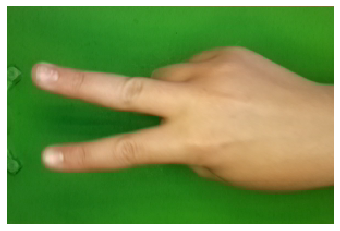

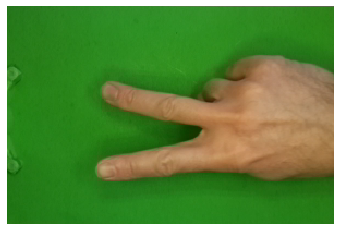

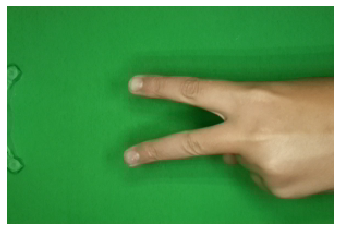

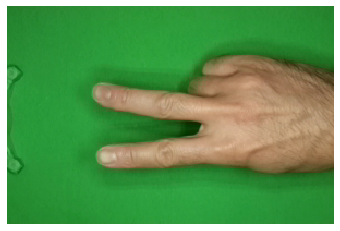

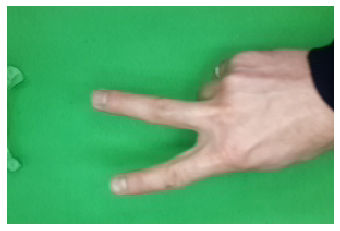

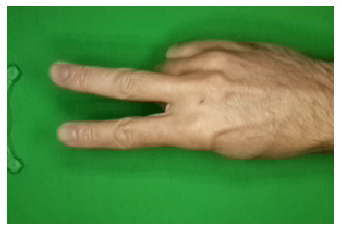

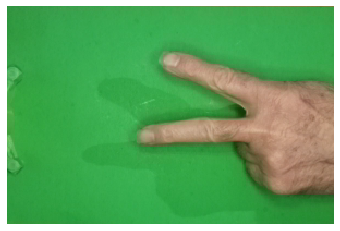

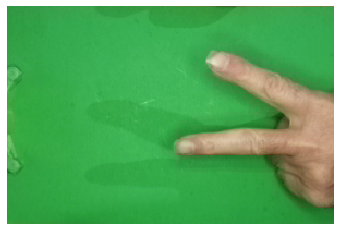


 operation terminated



In [8]:
#evaluasi data 2
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
%matplotlib inline

pic = 10
try:
    img_paper = [os.path.join(paper_dir,fname)for fname in paper_data[pic-10:pic]]
    img_rock = [os.path.join(rock_dir,fname)for fname in rock_data[pic-10:pic]]
    img_scissor = [os.path.join(scissors_dir,fname)for fname in scissors_data[pic-10:pic]]

    for i,img_path in enumerate(img_paper+img_rock+img_scissor):
      img = imgplot.imread(img_path)
      plt.imshow(img)
      plt.axis('off')
      plt.show()
except(FileExistsError,FileNotFoundError):
  print('directory tidak valid')

finally:
  print('\n operation terminated\n')

In [15]:
#data load and preprocessing
import tensorflow as tf
import numpy as np
import tensorflow.keras.preprocessing.image as img
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator

batch_size = 32
img_h = 200
img_w = 300


try:
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,
        zca_whitening=False, 
        #zca_epsilon=1e-06, 
        rotation_range=0, 
        width_shift_range=0.2,
        height_shift_range=0.2, 
        brightness_range=None, 
        shear_range=0.2, 
        zoom_range=0.2,
        channel_shift_range=0.0, 
        fill_mode='nearest', 
        cval=0.0, 
        horizontal_flip=True,
        vertical_flip=False,  
        validation_split=0.2
        

    )


    train_set = train_datagen.flow_from_directory(
        train_directory,
        batch_size=126,
        shuffle = True,
        target_size = (img_h, img_w),
        color_mode ='rgb',
        class_mode = 'categorical',
        interpolation = 'nearest',
        subset = 'training'

    )

    validation_set = train_datagen.flow_from_directory(
        train_directory,
        batch_size=126,
        target_size= (img_h,img_w),
        color_mode = 'rgb',
        class_mode = 'categorical',
        interpolation = 'nearest',
        shuffle = True,
        subset = 'validation'
    )



except:
  print('\nImage Data generator error')
  print('coba eksekusi terlebih dahulu cell di atas\n')
#view = tf.keras.datasets.train_generator

finally:
  print('\n operation terminated\n')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.

 operation terminated



In [16]:

print('\nTrain dataset\n')
print(train_set.image_shape)
print(train_set.class_indices)
print(train_set.class_mode)
print('\nvalidation dataset\n')
print(validation_set.image_shape)
print(validation_set.class_indices)
print(validation_set.class_mode)


Train dataset

(200, 300, 3)
{'paper': 0, 'rock': 1, 'scissors': 2}
categorical

validation dataset

(200, 300, 3)
{'paper': 0, 'rock': 1, 'scissors': 2}
categorical


In [17]:
#Training model squential

train_model = tf.keras.models.Sequential([
     #1                                     
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #2
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    
    #3
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
  
  
    #final
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')                                       
]
)
train_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 99, 149, 64)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 147, 128)      73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 73, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 71, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 103040)           

In [18]:
#COMPILE TRAINING DATA SET
train_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

history = train_model.fit(
  train_set,
  epochs = 10,
  steps_per_epoch = 25,
  validation_data = validation_set,
  verbose = 1,
  validation_steps = 3
)

train_model.save('rps.h5')



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 3 steps
Epoch 1/10
 1/25 [>.............................] - ETA: 8:15

ResourceExhaustedError:  OOM when allocating tensor with shape[126,64,198,298] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_2/conv2d_6/Conv2D (defined at <ipython-input-18-4e5500fe31e5>:14) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_2448]

Function call stack:
distributed_function


Saving 1MOm36DHK0R8OfIC.png to 1MOm36DHK0R8OfIC (2).png


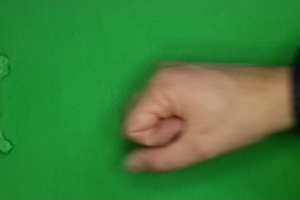

[[[[ 30. 121.  45.]
   [ 32. 124.  47.]
   [ 31. 123.  46.]
   ...
   [ 34. 128.  49.]
   [ 35. 130.  50.]
   [ 38. 128.  52.]]

  [[ 29. 123.  46.]
   [ 29. 123.  46.]
   [ 29. 123.  46.]
   ...
   [ 34. 131.  48.]
   [ 34. 131.  48.]
   [ 35. 130.  50.]]

  [[ 30. 125.  47.]
   [ 29. 123.  46.]
   [ 29. 123.  46.]
   ...
   [ 34. 131.  48.]
   [ 34. 131.  48.]
   [ 36. 131.  51.]]

  ...

  [[ 31. 131.  45.]
   [ 32. 132.  48.]
   [ 32. 132.  48.]
   ...
   [ 22.  97.  27.]
   [ 21.  96.  25.]
   [ 23.  95.  25.]]

  [[ 32. 132.  46.]
   [ 34. 134.  50.]
   [ 32. 132.  48.]
   ...
   [ 22.  97.  27.]
   [ 23.  98.  28.]
   [ 24.  96.  27.]]

  [[ 33. 133.  47.]
   [ 33. 133.  47.]
   [ 33. 133.  47.]
   ...
   [ 20.  95.  24.]
   [ 21.  96.  25.]
   [ 24.  96.  29.]]]]

 operation terminated



In [0]:
#keras prediction
import IPython.display as display
import numpy as np
from PIL import  Image
from keras.preprocessing import image
import google.colab.files as files

try:
    upload = files.upload()

    for fn in upload.keys():
      path = fn
      img = image.load_img(path,target_size=(img_h,img_w))
      predict_img = image.img_to_array(img)
      predict_img = np.expand_dims(predict_img,axis=0)

    image_final = np.vstack([predict_img])
    display.display(img)
    #predict = train_model.predict(image_final,batch_size=32)
    #print(predict)

    #array 2 dimensi dari gambar
    print(image_final)

#except:
#  print('terjadi kesalahan')
finally:
  print('\n operation terminated\n')